In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 11:07:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:

current_path = !pwd
print(current_path[0])  

full_path = f"{current_path[0]}/Dataset2014.csv"
print(full_path)  

df = spark.read.csv(full_path)


/home/ubuntu/BDAS
/home/ubuntu/BDAS/Dataset2014.csv


In [3]:

current_path = !pwd

full_path = f"{current_path[0]}/Dataset2014.csv"

df = spark.read.csv(full_path)


In [4]:
df.show()

23/10/11 11:07:38 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----------------+---+------+---------------+-----+-------------+--------------+---------+--------------+--------------+-----------+------------+----------+------------+----------------+----------+----------+------------------+--------------------+--------------------+------------+------------+--------------------+--------------------+------------------+---------------+--------------------+
|             _c0|_c1|   _c2|            _c3|  _c4|          _c5|           _c6|      _c7|           _c8|           _c9|       _c10|        _c11|      _c12|        _c13|            _c14|      _c15|      _c16|              _c17|                _c18|                _c19|        _c20|        _c21|                _c22|                _c23|              _c24|           _c25|                _c26|
+----------------+---+------+---------------+-----+-------------+--------------+---------+--------------+--------------+-----------+------------+----------+------------+----------------+----------+----------+----

In [5]:
df = spark.read.csv(full_path, header=True, inferSchema=True)


In [6]:
from pyspark.sql.functions import count

age_distribution = df.groupBy("Age").agg(count("Age").alias("count")).orderBy("Age")
age_distribution.show()


+-----+-----+
|  Age|count|
+-----+-----+
|-1726|    1|
|  -29|    1|
|   -1|    1|
|    5|    1|
|    8|    1|
|   11|    1|
|   18|    7|
|   19|    9|
|   20|    6|
|   21|   16|
|   22|   21|
|   23|   51|
|   24|   46|
|   25|   61|
|   26|   75|
|   27|   71|
|   28|   68|
|   29|   85|
|   30|   63|
|   31|   67|
+-----+-----+
only showing top 20 rows



In [7]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


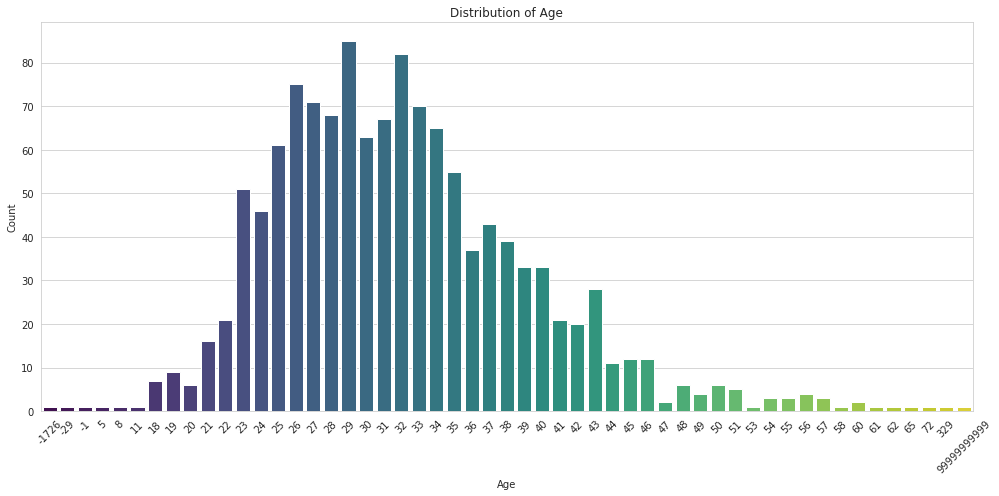

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pdf = age_distribution.toPandas()

sns.set_style("whitegrid")

plt.figure(figsize=(14,7))
sns.barplot(x="Age", y="count", data=pdf, palette="viridis")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


In [9]:
from pyspark.sql.functions import avg

average_age = df.agg(avg("Age").alias("average_age"))
average_age.show()


+-------------------+
|        average_age|
+-------------------+
|7.942814831135821E7|
+-------------------+



In [10]:

current_path = !pwd

full_path = f"{current_path[0]}/Dataset2016.csv"

df1 = spark.read.csv(full_path)

In [11]:
df1.show()

+-------------+--------------+------------+-------------+--------------------+-------------+----------------+------------+------------+--------------------+--------------------+--------------------+---------+----------+------------------+---------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+---------+--------------+--------------------+--------------------+----------------+--------------------+---------+--------------------+

In [12]:
df1 = spark.read.csv(full_path, header=True, inferSchema=True)


In [13]:
df1.show()
df1.printSchema()


+-------------+--------------+------------+-------------+--------------------+-------------+----------------+------------+------------+--------------------+-------------------------+-----------------------+---------+----------+------------------+---------------+-----------------------+-------------------+-----------------------------+-----------------------------------------+--------------------------------+--------------------------------------------+--------------------------+------------------+---------+--------------------------+--------------------------+-----------------------------------+----------------------------+----------------------------+--------------------------------------------+------------------------------------------+----------------------------+-----------------------------+-------------------------------------+----------------------------------+---------------------+-----------------------------+-----------------------+---------------------------+----------------

In [14]:
from pyspark.sql.functions import count

age_distribution = df1.groupBy("Age").agg(count("Age").alias("count")).orderBy("Age")
age_distribution.show()


+----+-----+
| Age|count|
+----+-----+
|null|    0|
|   1|    3|
|  15|    1|
|  17|    1|
|  19|    4|
|  20|    6|
|  21|   14|
|  22|   30|
|  23|   21|
|  24|   41|
|  25|   43|
|  26|   61|
|  27|   63|
|  28|   73|
|  29|   76|
|   3|    1|
|  30|   94|
|  31|   81|
|  32|   68|
| 323|    1|
+----+-----+
only showing top 20 rows



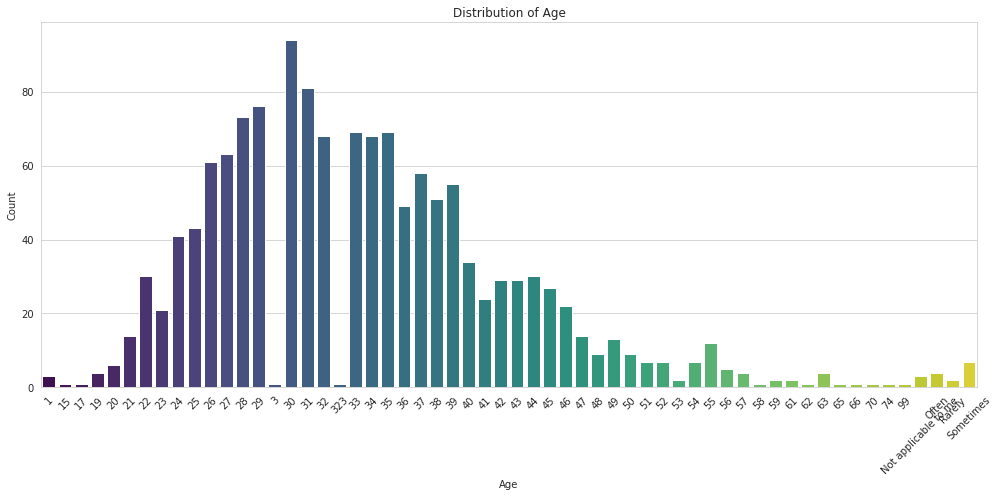

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pdf = age_distribution.toPandas()

sns.set_style("whitegrid")

plt.figure(figsize=(14,7))
sns.barplot(x="Age", y="count", data=pdf, palette="viridis")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

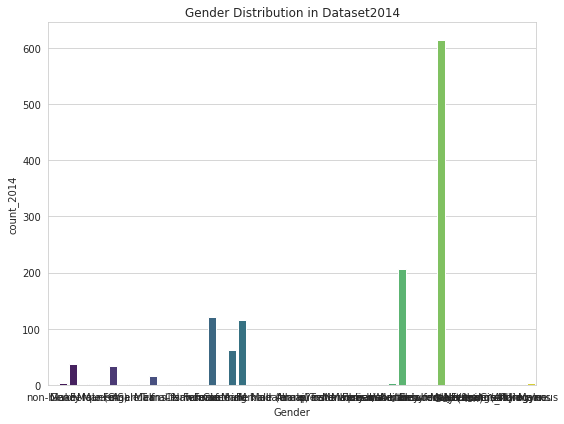

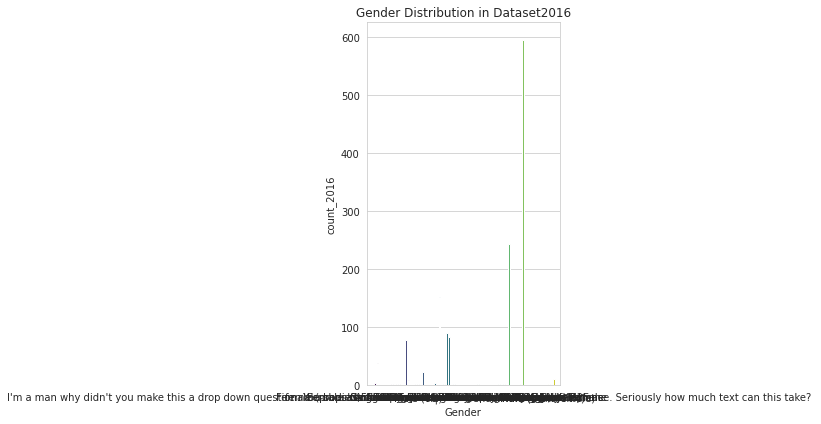

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import count


gender_dist_2014 = df.groupBy("Gender").agg(count("Gender").alias("count_2014"))
pdf_2014 = gender_dist_2014.toPandas()


plt.figure(figsize=(8,6))
sns.barplot(x="Gender", y="count_2014", data=pdf_2014, palette="viridis")
plt.title('Gender Distribution in Dataset2014')
plt.tight_layout()
plt.show()


gender_dist_2016 = df1.groupBy("Gender").agg(count("Gender").alias("count_2016"))
pdf_2016 = gender_dist_2016.toPandas()


plt.figure(figsize=(8,6))
sns.barplot(x="Gender", y="count_2016", data=pdf_2016, palette="viridis")
plt.title('Gender Distribution in Dataset2016')
plt.tight_layout()
plt.show()


In [17]:

gender_dist_2014 = df.groupBy("Gender").agg(count("Gender").alias("count_2014"))
print("Gender Distribution in Dataset2014:")
gender_dist_2014.show(gender_dist_2014.count())

gender_dist_2016 = df1.groupBy("Gender").agg(count("Gender").alias("count_2016"))
print("Gender Distribution in Dataset2016:")
gender_dist_2016.show(gender_dist_2016.count())


Gender Distribution in Dataset2014:
+--------------------+----------+
|              Gender|count_2014|
+--------------------+----------+
|          non-binary|         1|
|                Make|         4|
|                   F|        38|
|         Genderqueer|         1|
|                 Man|         2|
|          Male (CIS)|         1|
|                   m|        34|
|             Female |         2|
|             Agender|         1|
|                 Mal|         1|
|                   f|        15|
|               maile|         1|
|        Trans-female|         1|
|                 Nah|         1|
|          Cis Female|         1|
|               woman|         1|
|              Female|       121|
|             Cis Man|         1|
|              female|        62|
|                   M|       116|
|something kinda m...|         1|
|                Malr|         1|
|      Female (trans)|         2|
|                 All|         1|
|              femail|         1|
|           

In [18]:
from pyspark.sql.functions import count


no_employees_dist_2014 = df.groupBy("no_employees").agg(count("no_employees").alias("count_2014"))
print("No. of Employees Distribution in Dataset2014:")
no_employees_dist_2014.show(no_employees_dist_2014.count())


no_employees_dist_2016 = df1.groupBy("no_employees").agg(count("no_employees").alias("count_2016"))
print("No. of Employees Distribution in Dataset2016:")
no_employees_dist_2016.show(no_employees_dist_2016.count())


No. of Employees Distribution in Dataset2014:
+--------------+----------+
|  no_employees|count_2014|
+--------------+----------+
|       100-500|       176|
|        Jun-25|       290|
|        01-May|       162|
|      500-1000|        60|
|More than 1000|       282|
|        26-100|       289|
+--------------+----------+

No. of Employees Distribution in Dataset2016:
+--------------------+----------+
|        no_employees|count_2016|
+--------------------+----------+
|    mobility issues)|         1|
| plenty of other ...|         1|
| and as such one ...|         1|
|                null|         0|
| I try to judge w...|         1|
|             100-500|       248|
|              Jun-25|       210|
|   I think it would"|         1|
|               Maybe|         2|
|Yes, I think it w...|         2|
| he was a ""maste...|         1|
|             sisters|         1|
| and they don't k...|         1|
|              01-May|        60|
|                  No|         3|
|            50

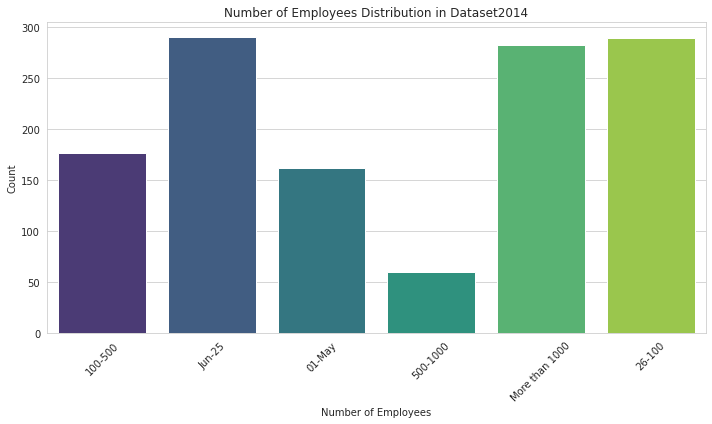

/tmp/ipykernel_2147/708240341.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


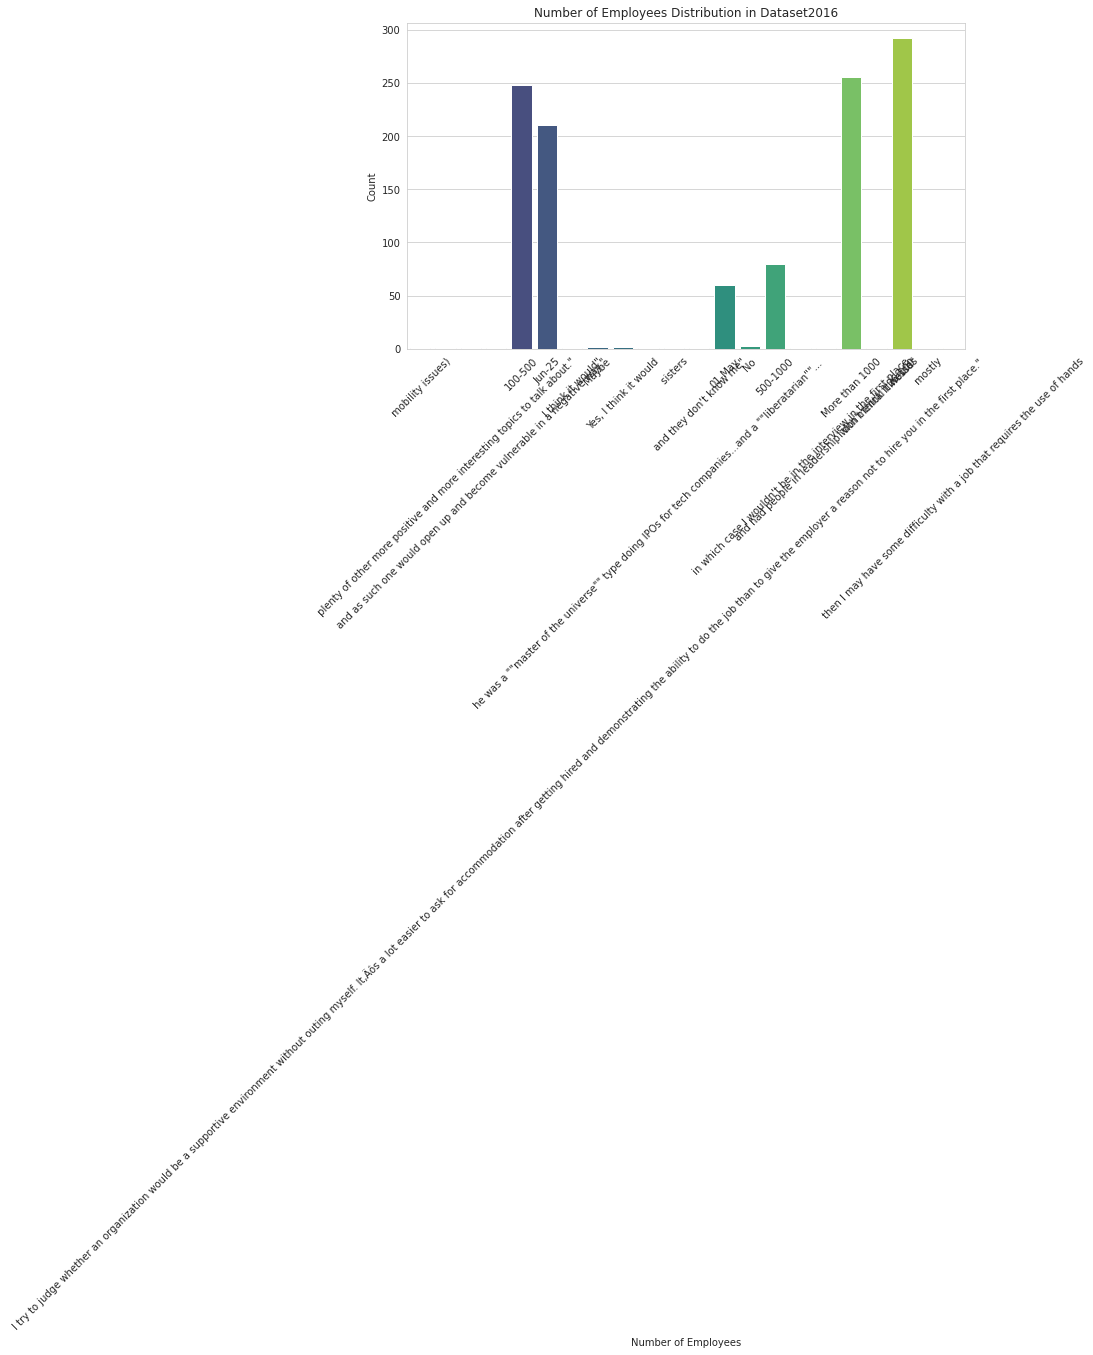

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset2014
pdf_2014 = no_employees_dist_2014.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="no_employees", y="count_2014", data=pdf_2014, palette="viridis")
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.title('Number of Employees Distribution in Dataset2014')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Dataset2016
pdf_2016 = no_employees_dist_2016.toPandas()

plt.figure(figsize=(10,6))
sns.barplot(x="no_employees", y="count_2016", data=pdf_2016, palette="viridis")
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.title('Number of Employees Distribution in Dataset2016')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
from pyspark.sql.functions import count

remote_work_dist_2014 = df.groupBy("remote_work").agg(count("remote_work").alias("count_2014"))
print("Remote Work Distribution in Dataset2014:")
remote_work_dist_2014.show(remote_work_dist_2014.count())

remote_work_dist_2016 = df1.groupBy("remote_work").agg(count("remote_work").alias("count_2016"))
print("Remote Work Distribution in Dataset2016:")
remote_work_dist_2016.show(remote_work_dist_2016.count())


Remote Work Distribution in Dataset2014:
+-----------+----------+
|remote_work|count_2014|
+-----------+----------+
|         No|       883|
|        Yes|       376|
+-----------+----------+

Remote Work Distribution in Dataset2016:
+--------------------+----------+
|         remote_work|count_2016|
+--------------------+----------+
|                Ohio|         1|
|One-person shop|D...|         1|
|           Sometimes|       736|
|Other|One-person ...|         1|
|Other|Supervisor/...|         1|
|                null|         0|
|     DevOps/SysAdmin|         2|
|Front-end Develop...|         1|
|DevOps/SysAdmin|S...|         1|
|United States of ...|         3|
|DevOps/SysAdmin|B...|         1|
|               Never|       327|
|              Always|       334|
|Dev Evangelist/Ad...|         1|
|Executive Leaders...|         1|
|Designer|Front-en...|         1|
|            New York|         1|
|Back-end Develope...|         1|
|Supervisor/Team Lead|         1|
+------------------

In [21]:
from pyspark.sql.functions import count, mean, stddev, min, max

age_stats_2014 = df.agg(
    count("Age").alias("count"),
    mean("Age").alias("mean"),
    stddev("Age").alias("stddev"),
    min("Age").alias("min"),
    max("Age").alias("max")
)
print("Age Statistics in Dataset2014:")
age_stats_2014.show()

age_stats_2016 = df1.agg(
    count("Age").alias("count"),
    mean("Age").alias("mean"),
    stddev("Age").alias("stddev"),
    min("Age").alias("min"),
    max("Age").alias("max")
)
print("Age Statistics in Dataset2016:")
age_stats_2016.show()


Age Statistics in Dataset2014:
+-----+-------------------+--------------------+-----+-----------+
|count|               mean|              stddev|  min|        max|
+-----+-------------------+--------------------+-----+-----------+
| 1259|7.942814831135821E7|2.8182994429819684E9|-1726|99999999999|
+-----+-------------------+--------------------+-----+-----------+

Age Statistics in Dataset2016:
+-----+-----------------+------------------+---+---------+
|count|             mean|            stddev|min|      max|
+-----+-----------------+------------------+---+---------+
| 1416|34.27428571428572|11.462986220839342|  1|Sometimes|
+-----+-----------------+------------------+---+---------+



In [22]:

print("Columns in Dataset2014:")
for col in df.columns:
    print(col)

print("\n")

print("Columns in Dataset2016:")
for col in df1.columns:
    print(col)


Columns in Dataset2014:
Timestamp
Age
Gender
Country_working
state
self_employed
family_history
treatment
work_interfere
no_employees
remote_work
tech_company
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_health_interview
phys_health_interview
mental_vs_physical
obs_consequence
comments


Columns in Dataset2016:
self_employed
no_employees
tech_company
position_tech
benefits
care_options
wellness_program
seek_help
anonymity
leave
mental_health_consequence
phys_health_consequence
coworkers
supervisor
mental_vs_physical
obs_consequence
mental_health_insurance
online_resources
openness_mental_health_client
openness_mental_health_consequence_client
openness_mental_health_coworkers
openness_mental_health_consequence_coworkers
productivity_affectiveness
percentage_afected
first_job
previous_employers_benefit
previous_employers_options
previous_employers_wellness_program
previous_employers_seek_hel

In [23]:

df_2014_dropped = df.drop("Timestamp", "state", "comments")


df_2016_dropped = df1.drop("state", "State_working", "why_whynot_interview_physical", "why_whynot_interview_mental", "Country")

print("Columns in Updated Dataset2014:")
print(df_2014_dropped.columns)

print("\nColumns in Updated Dataset2016:")
print(df_2016_dropped.columns)


Columns in Updated Dataset2014:
['Age', 'Gender', 'Country_working', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

Columns in Updated Dataset2016:
['self_employed', 'no_employees', 'tech_company', 'position_tech', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence', 'mental_health_insurance', 'online_resources', 'openness_mental_health_client', 'openness_mental_health_consequence_client', 'openness_mental_health_coworkers', 'openness_mental_health_consequence_coworkers', 'productivity_affectiveness', 'percentage_a

In [26]:

df_2014_dropped = df.drop("Timestamp", "state", "comments")


df_2016_dropped = df1.drop("state", "State_working", "why_whynot_interview_physical", "why_whynot_interview_mental", "Country")

num_columns_2014_dropped = len(df_2014_dropped.columns)
print(f"Number of columns in Dataset2014 after dropping specified columns: {num_columns_2014_dropped}")


num_columns_2016_dropped = len(df_2016_dropped.columns)
print(f"Number of columns in Dataset2016 after dropping specified columns: {num_columns_2016_dropped}")



Number of columns in Dataset2014 after dropping specified columns: 24
Number of columns in Dataset2016 after dropping specified columns: 58


In [27]:
from pyspark.sql.functions import col, count, when

def drop_columns_with_missing_data_above_threshold(df, threshold=0.5):

    missing_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).collect()[0].asDict()
    
    total_rows = df.count()
    columns_to_drop = [c for c, missing_count in missing_counts.items() if (missing_count / total_rows) > threshold]
    

    df_dropped = df.drop(*columns_to_drop)
    
    return df_dropped

df_2014_dropped = drop_columns_with_missing_data_above_threshold(df)
print(f"Number of columns in Dataset2014 after dropping columns with >50% missing data: {len(df_2014_dropped.columns)}")
print("Remaining columns in Dataset2014:", df_2014_dropped.columns)

print("\n")

df_2016_dropped = drop_columns_with_missing_data_above_threshold(df1)
print(f"Number of columns in Dataset2016 after dropping columns with >50% missing data: {len(df_2016_dropped.columns)}")
print("Remaining columns in Dataset2016:", df_2016_dropped.columns)


Number of columns in Dataset2014 after dropping columns with >50% missing data: 27
Remaining columns in Dataset2014: ['Timestamp', 'Age', 'Gender', 'Country_working', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']


Number of columns in Dataset2016 after dropping columns with >50% missing data: 51
Remaining columns in Dataset2016: ['self_employed', 'no_employees', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_vs_physical', 'obs_consequence', 'first_job', 'previous_employers_benefit', 'previous_employers_o